<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** Мамонтова Дарья Андреевна


## Импорт необходимых библиотек 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
df_gen= pd.read_csv('gender.csv')
df_gen.head()

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0


In [3]:
df_tran = pd.read_csv('C:\\Users\\user\\OneDrive\\Рабочий стол\\transactions.csv',sep=';')
df_tran.head()

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [4]:
a = df_tran[['user_id','value']].groupby(['user_id']).sum()
a = a.rename(columns={'value':'value_sum'})
b =df_tran[['user_id','value']].groupby(['user_id']).mean()
b =b.rename(columns={'value':'value_mean'})
c =df_tran[['user_id','value']].groupby(['user_id']).std()
c =c.rename(columns={'value':'value_std'})

In [5]:
pre = a.join(b,how='left')
final = pre.join(c,how='left')
final.head()

,value_sum,value_mean,value_std
user_id,,,
22899,274383.315,2143.619648,656.186785
27914,166436.523,2521.765500,415.972053
28753,251578.185,1980.930591,749.304999
31385,717856.052,2323.158744,632.491585
38084,1360028.958,2095.576206,649.030870


In [6]:
final = final.reset_index(drop=False)

In [7]:
final.head()

,user_id,value_sum,value_mean,value_std
0,22899,274383.315,2143.619648,656.186785
1,27914,166436.523,2521.765500,415.972053
2,28753,251578.185,1980.930591,749.304999
3,31385,717856.052,2323.158744,632.491585
4,38084,1360028.958,2095.576206,649.030870


In [8]:
df = final.merge(df_gen,left_on='user_id',right_on='user_id')
df.head()

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0


In [9]:
df = df.fillna(0)

In [10]:
df.isnull().sum().sum()

0

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [11]:
y = df['gender']
df = df.drop('gender',axis=1)
X = df

In [12]:
np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression().fit(X_train,y_train)
print(f'for test: {lr.predict_proba(X_test)}')

for test: [[0.53481297 0.46518703]
 [0.5150935  0.4849065 ]
 [0.5564718  0.4435282 ]
 ...
 [0.56647368 0.43352632]
 [0.51395917 0.48604083]
 [0.5715865  0.4284135 ]]


### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [15]:
#ROC_AUC
from sklearn.metrics import roc_auc_score

p_pred = lr.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.4957618025751073

In [16]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.5508373205741627

In [17]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.40350877192982454

In [18]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.031081081081081083

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ Качество получившейся модели низкое, об этом говорят низкие значения ROC AUC и accuracy. Такое может получиться из-за того, что наши данные:
- неотмасштабированы 
- слишком мало характеристик для предсказания

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [19]:
df_1= pd.pivot_table(df_tran, values='value', index=['user_id'], columns=['type'], aggfunc=np.sum)

In [20]:
df_1 = df_1.fillna(0)
df_1.head()

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [21]:
df_g = df_gen.set_index('user_id')

In [22]:
fin = df_1.merge(df_g,left_index=True,right_index=True)

In [23]:
fin.head()

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y_new = fin['gender']
fin = fin.drop('gender',axis=1)
X_new = fin

In [25]:
np.random.seed(19)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2)

In [26]:
lrr = LogisticRegression().fit(X_train_new,y_train_new)
print(f'for test: {lrr.predict_proba(X_test_new)}')

for test: [[3.37773410e-01 6.62226590e-01]
 [5.61679525e-01 4.38320475e-01]
 [5.05281698e-01 4.94718302e-01]
 ...
 [8.19013788e-05 9.99918099e-01]
 [4.38503745e-01 5.61496255e-01]
 [5.19479151e-01 4.80520849e-01]]


In [27]:
#ROC_AUC
p_pr = lrr.predict_proba(X_test_new)
roc_auc_score(y_test_new, p_pr[:,-1])

0.8016803222771958

In [28]:
#accuracy
y_pr = lrr.predict(X_test_new)
accuracy_score(y_test_new,y_pr)

0.7314593301435407

In [29]:
#precision
precision_score(y_test_new,y_pr)

0.7366197183098592

In [30]:
#recall
recall_score(y_test_new,y_pr)

0.6662420382165605

### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ Да, качество модели улучшилось, так как теперь у нас появилось больше признаков, по которым мы можем предсказывать значение целевой переменной.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_new)
X_test = scaler.fit_transform(X_test_new)

In [32]:
col_name = fin.columns

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели логистической регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#подберём solver
np.random.seed(19)
logres = LogisticRegression()
param_grid = {'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
best = GridSearchCV(logres,param_grid,cv=4)
best.fit(X_train,y_train_new)
best.best_estimator_

LogisticRegression(solver='saga')

In [35]:
lr_n = LogisticRegression(solver='saga')
param_grid = {'penalty':['elasticnet', 'l1', 'l2', None],'tol':[0.03,0.001,0.7,0.0058,0.9,0.0345],'C':np.arange(40)}

In [36]:
searcher_lr = GridSearchCV(lr_n,param_grid,scoring="roc_auc", cv=4)
searcher_lr.fit(X_train, y_train_new)

GridSearchCV(cv=4, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                         'penalty': ['elasticnet', 'l1', 'l2', None],
                         'tol': [0.03, 0.001, 0.7, 0.0058, 0.9, 0.0345]},
             scoring='roc_auc')

In [37]:
searcher_lr.best_estimator_

LogisticRegression(C=32, penalty='l1', solver='saga', tol=0.7)

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [34]:
lr_nn = LogisticRegression(C=32,penalty='l1',solver='saga',tol=0.7)
lr_nn.fit(X_train,y_train_new)
pred_lr = lr_nn.predict(X_test)

In [35]:
#accuracy
accuracy_score(y_test_new, pred_lr)

0.6973684210526315

In [36]:
#precision_score
precision_score(y_test_new, pred_lr)

0.8120805369127517

In [37]:
#recall
recall_score(y_test_new, pred_lr)

0.4624203821656051

In [38]:
#ROC_AUC
roc_auc_score(y_test_new, pred_lr)

0.6838595710151589

Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:Нельзя сказать о том, что получилось добиться улучшения качества, поскольку такие метрики как ROC AUC и accuracy упали. Произошло это из-за того, что мы сосредоточены только на одной метрике (roc auc).
- Кросс-валидация позволяет проверить, как хорошо модель обобщается на новые данные, которые не были использованы в обучении модели.
- Отложенная тестовая выборка используется для проверки качества модели на полностью независимом наборе данных, который не был использован при обучении и выборе гиперпараметров.
- Получается, что использование кросс-валидации и отложенной тестовой выборки одновременно позволяет более точно оценить качество модели и обеспечить ее устойчивость и надежность при применении на новых данных.

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [39]:
from sklearn.metrics import fbeta_score

In [40]:
lr_f = LogisticRegression(C=32,penalty='l1',solver='saga',tol=0.7)
lr_f.fit(X_train,y_train_new)
pred_f = lr_f.predict_proba(X_test)

In [42]:
tt = np.arange(0,1,0.01)
fmax = []
prediction = []
for r in tt:
    pr = np.where(pred_f[:,1]>r,1,0)
    fmax.append(fbeta_score(y_test_new,pr,beta=5))
fmax = sorted(fmax,reverse=True) 
print(f'F-beta max:{fmax[0]}')

F-beta max:0.9584409485794788


Text(0, 0.5, 'F-beta')

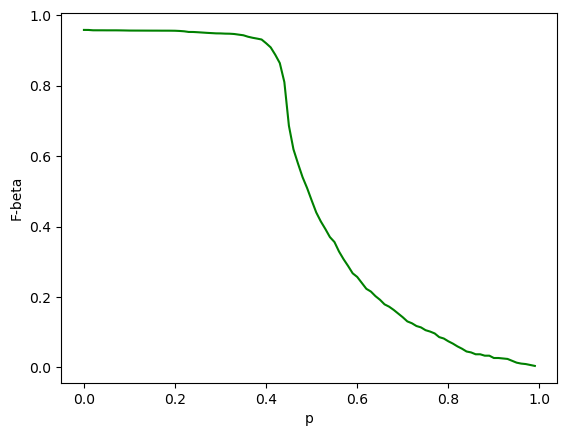

In [43]:
plt.plot(tt,fmax,color='green')
plt.xlabel('p')
plt.ylabel('F-beta')

In [44]:
x,y=np.histogram(fmax)
porog = x.max()/1000
print(f'Порог для максимальной F-beta меры: {porog}')

Порог для максимальной F-beta меры: 0.044


## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [48]:
weights = lr_f.coef_

In [49]:
#Выведем признаки, увеличивающие вероятность метки "0"
features_for_label_0 = []
for w, weight in enumerate(weights[0]):
    if weight < 0:
        features_for_label_0.append(col_name[w])
#Список довольно большой, поэтому выведем первые 3 признака
print(*features_for_label_0[:3],sep='\n')

Автобусные линии
Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка
Агенты и менеджеры по аренде недвижимости


In [50]:
#Выведем признаки,увеличивающие вероятность метки "1"
features_for_label_1 = []
for e, weight in enumerate(weights[0]):
    if weight > 0:
        features_for_label_1.append(col_name[e])
#Список довольно большой, поэтому выведем первые 3 признака
print(*features_for_label_1[:3],sep='\n')

Авиалинии, авиакомпании
Авиалинии, авиакомпании, нигде более не классифицированные
Автозапчасти и аксессуары


In [51]:
#Проверим, что всё правильно и признаки не пересекаются
aa = set(features_for_label_0)&set(features_for_label_1)
len(aa)

0

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

### Я буду использовать линейный дискриминантный анализ, он более устойчив, чем логистическая регрессия. Данные беру отмасштабированные, из предыдущего пункта.

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [53]:
model = LDA()
model.fit(X_train,y_train_new)

LinearDiscriminantAnalysis()

In [54]:
cv = RepeatedStratifiedKFold(n_splits=90, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test_new, scoring='roc_auc', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.7409362139917696


__Вывод__: Как мы видим, значение метрики ROC AUC удалось улучшить по сравнению со всеми остальными значениями, которые у нас получались в предыдущих пунктах.